In [3]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

### Bonus : PCA examples
### Eigenfaces : PCA as feature selector

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [5]:
# number of features (pixels)
62*47

2914

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use `RandomizedPCA`—it contains a randomized method to approximate the first  𝑁  principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [6]:
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

Now, let's take a look at first 24 basis components/features of images.  
처음 몇 개의 eigenface들은 빛의 각도 등 전반적인 feature라면 뒤로 갈수록 더 자세한 feature들(눈코입)의 map이 뽑아짐을 확인할 수 있다.

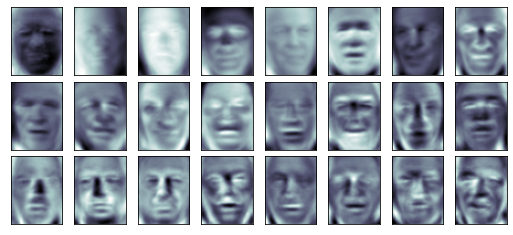

In [7]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

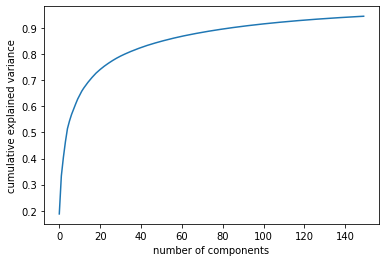

In [8]:
# how many components to choose?
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
# Compute the components and projected faces
pca = PCA(150, svd_solver = 'randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components) # reconstruction

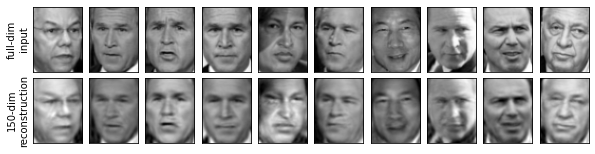

In [10]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### HW : PCA from scratch  
\- iris 데이터에 numpy만을 사용해서 PCA를 해봅시다!  
\- We can find PCA makes visualization easier!

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
X = df.iloc[:,:-1]
label = df.iloc[:,-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Using Covariance Matrix

In [17]:
# Step 1. Center Data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [27]:
# Step 2. Compute Covariance Matrix
cov_matrix = X_scaled.T @ X_scaled / (X_scaled.shape[0] - 1)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [28]:
# Step 3. Eigenvalue decomposition
eigvals, eigvecs = np.linalg.eig(cov_matrix)
eigvals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [29]:
# Ratio of explained variance per PC
explained_variances = []
for i in range(len(eigvals)):
    explained_variances.append(eigvals[i] / np.sum(eigvals))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.7277045209380132, 0.23030523267680636, 0.03683831957627398, 0.005151926808906408]


첫 번째, 두 번째 PC가 이미 variance의 95% 이상을 설명함을 확인할 수 있다!

In [37]:
# Visualization (Embedding)
pc1 = np.dot(X_scaled, eigvecs[:, 0])
pc2 = np.dot(X_scaled, eigvecs[:, 1])
res = pd.DataFrame(pc1, columns=['PC1'])
res['PC2'] = pc2
res['label'] = label
res.head()

,PC1,PC2,label
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


c:\users\hyeonjun.an\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1'>

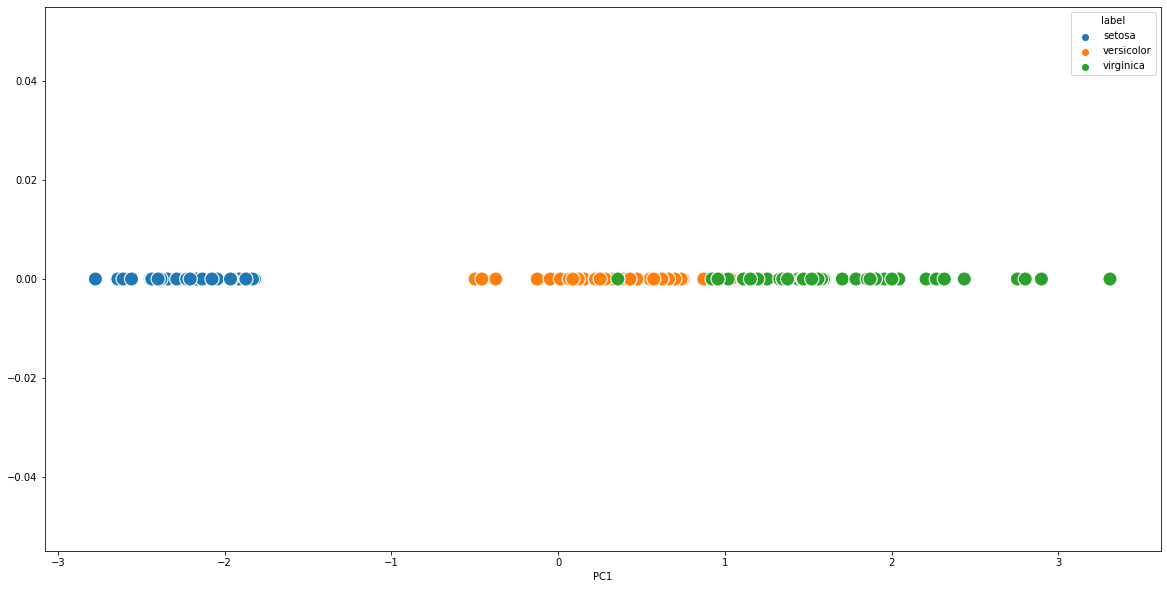

In [38]:
# Projection on 1-dim subspace
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['label'], s=200)

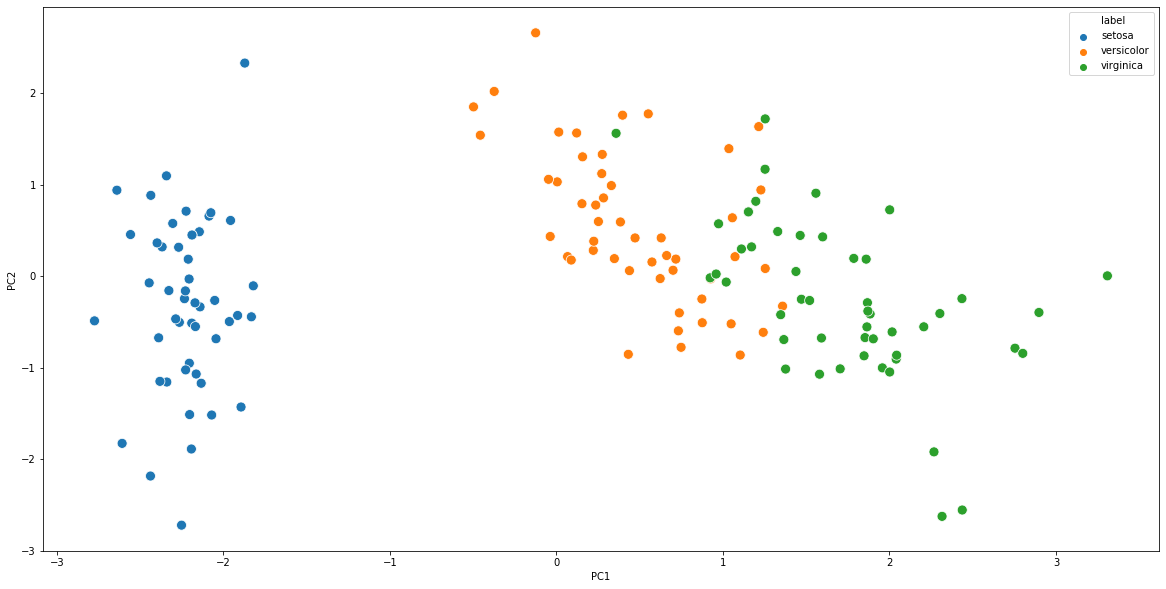

In [17]:
# Projection on 2-dim subspace
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['label'], s=100)

#### Shortcut

In [18]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
projection = sklearn_pca.fit_transform(X, y=label)

sklearn_pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [19]:
sklearn_pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

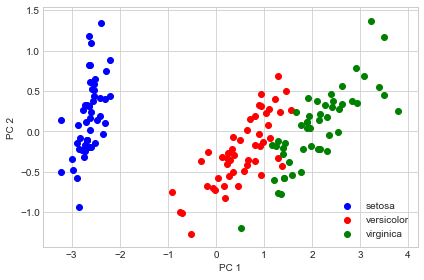

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(projection[label==lab, 0],
                    projection[label==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()